###### Content under Creative Commons Attribution license CC-BY 4.0, code under BSD 3-Clause License © 2017 L.A. Barba, N.C. Clementi

# Step to the future

Welcome to Lesson 2 of the course module "Fly at changing systems," in _Engineering Computations_. The previous lesson, [Catch things in motion](http://go.gwu.edu/engcomp3lesson1), showed you how to compute velocity and acceleration of a moving body whose positions were known. 

Time history of position can be captured on a long-exposure photograph (using a strobe light), or on video. But digitizing the positions from images can be a bit tedious, and error-prone. Luckily, we found online a data set from a fancy motion-capture experiment of a falling ball, with high resolution [1]. You computed acceleration and found that it was not only smaller than the theoretical value of $9.8 \rm{m/s}^2$, but it _decreased_ over time. The effect is due to air resistance and is what leads to objects reaching a _terminal velocity_ in freefall.

In general, not only is [motion capture](https://en.wikipedia.org/wiki/Motion_capture) (a.k.a., _mo-cap_) expensive, but it's inappropriate for many physical scenarios. Take a roller-coaster ride, for example: during design of the ride, it's more likely that the engineers will use an _accelerometer_. It really is the acceleration that makes a roller-coaster ride exciting, and they only rarely go faster than highway speeds (say, 60 mph) [2].
How would an engineer analyze data captured with an accelerometer?

## A roller-coaster ride

Prof. Anders Malthe-Sorenssen has a file with accelerometer data for a roller-coaster ride called "The Rocket" (we don't know if it's real or made up!). He has kindly given permission to use his data. So let's load it and have a look. We'll first need our favorite numerical Python libraries, of course.

In [1]:
import numpy
from matplotlib import pyplot

In [2]:
%matplotlib inline

#Import rcParams to set font styles
from matplotlib import rcParams

#Set font style and size 
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14

If you don't have the data file in the location we assume below, you can get it by adding a code cell and executing this code in it, then commenting or deleting the `filename` assignment before the call to `numpy.loadtxt()`.

```Python
from urllib.request import urlretrieve
URL = 'http://go.gwu.edu/engcomp3data2?accessType=DOWNLOAD'
urlretrieve(URL, 'therocket.txt')
```

In [3]:
filename = '../../data/therocket.txt'
t, a = numpy.loadtxt(filename, usecols=[0,1], unpack=True)

We'll take a peek at the data by printing the first five pairs of $(t, a)$ values, then plot the whole set below. Time is given in units of seconds, while acceleration is in $\rm{m/s}^2$.

In [4]:
for i in range(0,5): print(t[i],a[i])

0.0 0.2731644
0.1 1.4411079
0.2 2.6693138
0.3 4.2383806
0.4 5.6499504


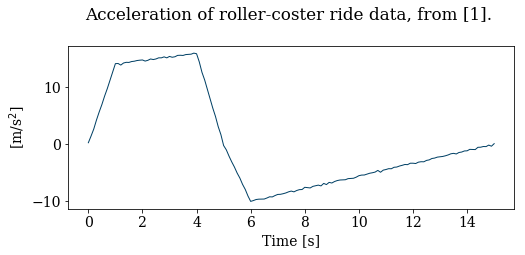

In [5]:
fig = pyplot.figure(figsize=(8, 3))

pyplot.plot(t, a, color='#004065', linestyle='-', linewidth=1) 
pyplot.title('Acceleration of roller-coster ride data, from [1]. \n')
pyplot.xlabel('Time [s]')
pyplot.ylabel('[m/s$^2$]');

Our challenge now is to find the motion description—the position $x(t)$—from the acceleration data. In the [previous lesson](http://go.gwu.edu/engcomp3lesson1), we did the opposite: with position data, get the velocity and acceleration, using _numerical derivatives_:

\begin{equation}
v(t_i) = \frac{dx}{dt} \approx \frac{x(t_i+\Delta t)-x(t_i)}{\Delta t}
\end{equation}

\begin{equation}
a(t_i) = \frac{dv}{dt} \approx \frac{v(t_i+\Delta t)-v(t_i)}{\Delta t}
\end{equation}

Since this time we're dealing with horizontal acceleration, we swapped the position variable from $y$ to $x$ in the equation for velocity, above. 

The key to our problem is realizing that if we have the initial velocity, we can use the acceleration data to find the velocity after a short interval of time. And if we have the initial position, we can use the known velocity to find the new position after a short interval of time. Let's rearrange the equation for acceleration above, by solving for the velocity at $t_i + \Delta t$:

\begin{equation}
 v(t_i+\Delta t)   \approx  v(t_i) + a(t_i) \Delta t
\end{equation}

We need to know the velocity and acceleration at some initial time, $t_0$, and then we can compute the velocity $v(t_i + \Delta t)$. For the roller-coaster ride, it's natural to assume that the initial velocity is zero, and the initial position is zero with respect to a convenient reference system. We're actually ready to solve this!

Let's save the time increment for our data set in a variable named `dt`, and compute the number of time increments in the data. Then, we'll initialize new arrays of velocity and position to all-zero values, with the intention of updating these to the computed values.

In [6]:
#time increment
dt = t[1]-t[0]
dt

0.10000000000000001

In [7]:
#number of time increments
N = len(t)
N

151

In [8]:
#initialize v and x arrays to zero
v = numpy.zeros(N)
x = numpy.zeros(N)

In the code cell below, we use a `for` statement to step through the sequence of acceleration values, each time computing the velocity and position at the subsequent time instant. We are applying the equation for $v(t_i + \Delta t)$ above, and a similar equation for position:

\begin{equation}
 x(t_i+\Delta t)   \approx  x(t_i) + v(t_i) \Delta t
\end{equation}

In [9]:
for i in range(N-1):
    v[i+1] = v[i] + a[i]*dt
    x[i+1] = x[i] + v[i]*dt

And there you have it. You have computed the velocity and position over time from the acceleration data. We can now make plots of the computed variables. Note that we use the Matplotlib [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html?highlight=matplotlib%20pyplot%20subplot#matplotlib.pyplot.subplot) function to get the two plots in one figure. The argument to `subplot()` is a set of three digits, corresponding to the number of rows, number of columns, and plot number in a matrix of sub-plots. 

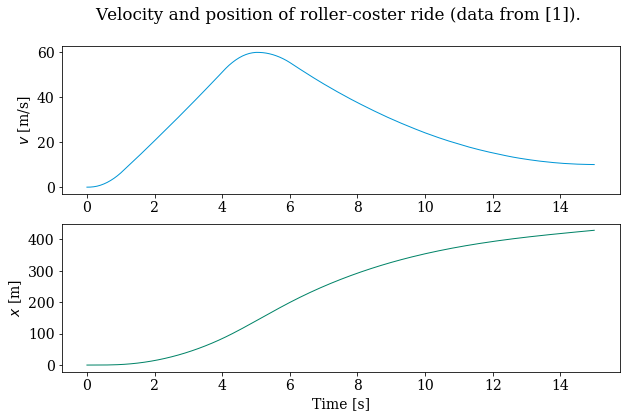

In [10]:
fig = pyplot.figure(figsize=(10,6))

pyplot.subplot(211)
pyplot.plot(t,  v, color='#0096d6', linestyle='-', linewidth=1) 
pyplot.title('Velocity and position of roller-coster ride (data from [1]). \n')
pyplot.ylabel('$v$ [m/s] ')

pyplot.subplot(212)
pyplot.plot(t,  x, color='#008367', linestyle='-', linewidth=1) 
pyplot.xlabel('Time [s]')
pyplot.ylabel('$x$ [m]');

## Euler's method

The method we used above to compute the velocity and position from acceleration data is known as _Euler's method_. The eminent Swiss mathematician Leonhard Euler presented it in his book _"Institutionum calculi integralis,"_ published around 1770 [3].

You can understand why it works by writing out a Taylor expansion for $x(t)$:

\begin{equation}
x(t+\Delta t) = x(t) + \frac{d x}{dt}\Delta t + \frac{d^2 x}{dt^2}\frac{\Delta t^2}{2} + \frac{d^3 x}{dt^3}\frac{\Delta t^3}{3!}+\cdots
\end{equation}

With $v=dx/dt$, you can see that the first two terms on the right-hand side correspond to what we used in the code above. That means that Euler's method makes an approximation by throwing away the terms $\frac{d^2 x}{dt^2}\frac{\Delta t^2}{2} + \frac{d^3 x}{dt^3}\frac{\Delta t^3}{3!}+\cdots$. So the error made in _one step_ of Euler's method is proportional to $\Delta t^2$. Since we take $N=T/\Delta t$ steps (for a final time instant $T$), we conclude that the error overall is proportional to $\Delta t$. 

#### **Euler's method is a first-order method** because the error in the approximation goes with the first power of the time increment $\Delta t$.

## Initial-value problems

To get velocity and position from the acceleration data, we needed to know the _initial values_ of the velocity and position. Then we could apply Euler's method to _step in time_ starting at $t_0$, with time increment $\Delta t$. This setting corresponds to the numerical solution of _initial-value problems_. 
(We follow here the presentation in [4], p.86.)

Consider the differential equation corresponding to an object in free fall:

\begin{equation}
\ddot{y}=-g,
\end{equation}

where the dot above a variable represents the time derivative, and $g$ is the acceleration of gravity. Introducing the velocity as intermediary variable, we can write:

\begin{eqnarray}
\dot{y} &=& v \nonumber\\
\dot{v} &=& -g
\end{eqnarray}

The above is a system of two ordinary differential equations, with time as the independent variable. For its numerical solution, we need two initial conditions, and Euler's method:

\begin{eqnarray}
y(t_0) = y_0, \qquad y_{i+1} &=& y_i + \dot{y} \Delta t \nonumber\\
v(t_0) = v_0, \qquad v_{i+1} &=& v_i + \dot{v} \Delta t
\end{eqnarray}

It's so neatly symmetrical that it's just asking for a vectorized equation! Combine the two dependent variables into a vector of unknowns, $\mathbf{y}$:

\begin{equation}
\mathbf{y} = \begin{bmatrix}
y \\ v
\end{bmatrix},
\end{equation}

and write the differential equation in vector form, as follows:

\begin{equation}
\dot{\mathbf{y}} = \begin{bmatrix}
v \\ -g
\end{bmatrix}.
\end{equation}

Equation (9) above represents the _state_ of the system, at any given instant in time. A code design for the numerical solution that generalizes to other changing systems (or _dynamical systems_) is to write one function that computes the right-hand side of the differential equation (the derivatives of the state variables), and another function that takes a state and applies the numerical method for each time increment. The solution is then computed in one `for` statement that calls these functions. Study the code below.

In [11]:
def freefall(state):
    '''Computes the right-hand side of the freefall differential 
    equation, in SI units.
    
    Arguments
    ----------    
    state : array of two dependent variables [y v]^T
    
    Returns
    -------
    derivs: array of two derivatives [v -g]^T
    '''
    
    derivs = numpy.array([state[1], -9.8])
    return derivs

In [12]:
def eulerstep(state, rhs, dt):
    '''Uses Euler's method to update a state to the next one. 
    
    Arguments
    ---------
    state: array of two dependent variables [y v]^T
    rhs  : function that computes the right hand side of the 
           differential equation.
    dt   : float, time increment. 
    
    Returns
    -------
    next_state: array, updated state after one time increment.       
    '''
    
    next_state = state + rhs(state) * dt
    return next_state

## Numerical solution vs. experiment

Here's an idea! Let's use the `freefall()` and `eulerstep()` functions to obtain a numerical solution with the same initial conditions as the falling-ball experiment from [Lesson 1](http://go.gwu.edu/engcomp3lesson1), and compare with the experimental data. 

You can grab the data from its location online running the following code in a new cell:
```Python
filename = 'fallingtennisball02.txt'
url = 'http://go.gwu.edu/engcomp3data1'
urlretrieve(url, filename)
```

You already imported `urlretrieve` above. Remember to then comment the assignment of the `filename` variable below. We'll load it from our local copy.

In [13]:
filename = '../../data/fallingtennisball02.txt'
t, y = numpy.loadtxt(filename, usecols=[0,1], unpack=True)

We'll need to use the same time increment, so let's compute it from two time samples. The initial position is the first value of the `y` array, while the initial velocity is zero. And we'll only look at the section of data before the ball bounces from the ground, which gives us the number of time steps.

In [14]:
#time increment
dt = t[1]-t[0]

In [15]:
y0 = y[0] #initial position
v0 = 0    #initial velocity
N = 576   #number of steps

Now, let's create a new array, called `num_sol`, to hold the results of the numerical solution. The array has dimensions `Nx2`, with each two-element row holding the state variables, $(y,v)$, at a given time instant. After saving the initial conditions in the solution array, we are ready to start stepping in time in a `for` statement. Study the code below.

In [16]:
#initialize array
num_sol = numpy.zeros([N,2])

In [17]:
#Set intial conditions
num_sol[0,0] = y0
num_sol[0,1] = v0

In [18]:
for i in range(N-1):
    num_sol[i+1] = eulerstep(num_sol[i], freefall, dt)

Did it work? Exciting! Let's plot in the same figure both the numerical solution and the experimental data. 

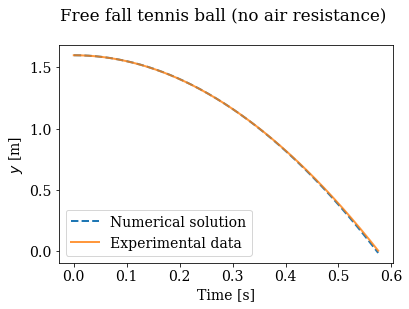

In [19]:
fig = pyplot.figure(figsize=(6,4))
pyplot.plot(t[:N], num_sol[:,0], linewidth=2, linestyle='--', label='Numerical solution')
pyplot.plot(t[:N], y[:N], linewidth=2, alpha=0.8, label='Experimental data')
pyplot.xlabel('Time [s]')
pyplot.ylabel('$y$ [m]')
pyplot.title('Free fall tennis ball (no air resistance) \n')
pyplot.legend();

The two lines look very close… but let's plot the difference to get an idea of the error.

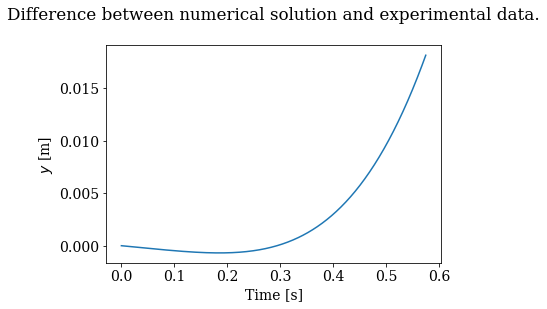

In [20]:
fig = pyplot.figure(figsize=(6,4))
pyplot.plot(t[:N], y[:N]-num_sol[:,0])
pyplot.title('Difference between numerical solution and experimental data.\n')
pyplot.xlabel('Time [s]')
pyplot.ylabel('$y$ [m]');

## Air resistance

In [Lesson 1](http://go.gwu.edu/engcomp3lesson1) of this module, we computed the acceleration of gravity and got a value less than the theoretical $9.8 \rm{m/s}^2$, even when using high-resolution experimental data. Did you figure out why?

We were missing the effect of air resistance! When an object moves in a fluid, like air, it applies a force on the fluid, and consequently the fluid applies an equal and opposite force on the object (Newton's third law).

This force is the *drag* of the fuid, and it opposes the direction of travel. The drag force depends on the object's geometry, and its velocity: for a sphere, its magnitude is given by:

\begin{equation}
    F_d = \frac{1}{2} \pi R^2 \rho C_d v^2,
\end{equation}

where $R$ is the radius of the sphere, $\rho$ the density of the fluid, $C_d$ the drag coefficient of a sphere, and $v$ is the velocity.

Since we have another force involved, we'll have to rethink the problem formulation. The state variables are still the same (position and velocity):

\begin{equation}
\mathbf{y} = \begin{bmatrix}
y \\ v
\end{bmatrix}.
\end{equation}

But we'll adjust the differential equation to add the effect of air resistance. In vector form, we can write it as follows:

\begin{equation}
\dot{\mathbf{y}} = \begin{bmatrix}
v \\ a_y
\end{bmatrix},
\end{equation}

where $a_y$ now includes the acceleration due to the drag force:

\begin{equation}
 a_y = -g + a_{\text{drag}} 
\end{equation}

With $F_{\text{drag}} = m a_{\text{drag}}$:

\begin{equation}
    a_{\text{drag}} = \frac{1}{2m} \pi R^2 \rho C_d v^2
\end{equation}

Finally, we can write our differential equation as:


\begin{equation}
\dot{\mathbf{y}} = \begin{bmatrix}
v \\ -g + a_{\text{drag}}
\end{bmatrix}.
\end{equation}

Let's write a new function for this modified right-hand side of a falling tennis ball with air resistance.

##### Note:

According to the International Tennis Federation, [ITF](http://www.itftennis.com/home.aspx), the diameter of a tennis ball has to be in the range of $6.54$–$6.86 \rm{cm}$, and its mass in the range of $56.0$–$59.4 \rm{g}$. We chose a value in the middle of the range for each quantity.

In [21]:
def fall_drag(state):
    '''Computes the right-hand side of the differential equation
    for the fall of a ball, with drag, in SI units.
    
    Arguments
    ----------    
    state : array of two dependent variables [y v]^T
    
    Returns
    -------
    derivs: array of two derivatives [v (-g+a_drag)]^T
    '''
    R = 0.0661/2 # radius in meters
    m = 0.0577   # mass in kilograms
    rho = 1.22   # air density kg/m^3
    C_d = 0.47   # drag coefficient for a sphere
    pi = numpy.pi
    
    a_drag = 1/(2*m) * pi * R**2 * rho * C_d * (state[1])**2
    
    derivs = numpy.array([state[1], -9.8 + a_drag])
    return derivs

Assume the same initial conditions as before:

In [22]:
y0 = y[0] # initial position
v0 = 0    # initial velocity
N = 576   # number of steps

In [23]:
# initialize array
num_sol_drag = numpy.zeros([N,2])

In [24]:
# Set intial conditions
num_sol_drag[0,0] = y0
num_sol_drag[0,1] = v0

In [25]:
for i in range(N-1):
    num_sol_drag[i+1] = eulerstep(num_sol_drag[i], fall_drag, dt)

Time to plot and see how it looks! Would you expect the results to be better than in the previous case? Let's plot the three cases and check the differences.

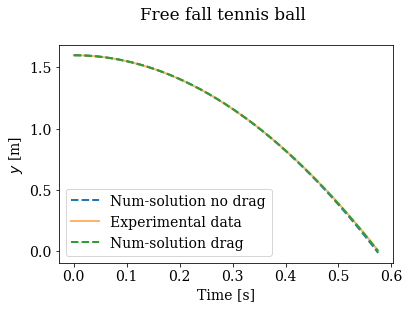

In [26]:
fig = pyplot.figure(figsize=(6,4))
pyplot.plot(t[:N], num_sol[:,0], linewidth=2, linestyle='--', label='Num-solution no drag')
pyplot.plot(t[:N], y[:N], linewidth=2, alpha=0.6, label='Experimental data')
pyplot.plot(t[:N], num_sol_drag[:,0], linewidth=2, linestyle='--', label='Num-solution drag')

pyplot.title('Free fall tennis ball \n')

pyplot.xlabel('Time [s]')
pyplot.ylabel('$y$ [m]')
pyplot.legend();

All the lines look very close… but let's plot the differences with the experimental data in both cases, to get an idea of the error.

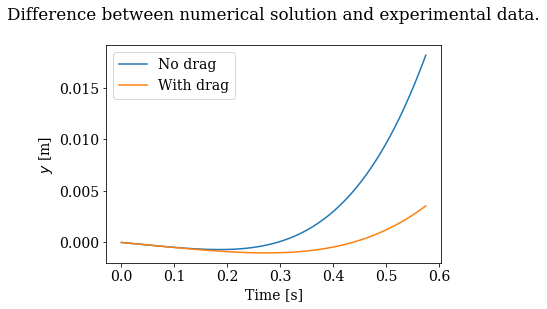

In [27]:
fig = pyplot.figure(figsize=(6,4))
pyplot.plot(t[:N], y[:N]-num_sol[:,0], label='No drag')
pyplot.plot(t[:N], y[:N]-num_sol_drag[:,0], label='With drag')
pyplot.title('Difference between numerical solution and experimental data.\n')
pyplot.xlabel('Time [s]')
pyplot.ylabel('$y$ [m]')
pyplot.legend();

##### Discuss with your neighbor

* What do you see in the plot of the difference between the numerical solution and the experimental data?

## What we've learned

* Integrating an equation of motion numerically.
* Drawing multiple plots in one figure,
* Solving initial-value problems numerically
* Using Euler's method.
* Euler's method is a first-order method.
* Freefall with air resistance is a more realistic model.

## References

1. _Elementary Mechanics Using Python_ (2015), Anders Malthe-Sorenssen, Undergraduate Lecture Notes in Physics, Springer. Data at http://folk.uio.no/malthe/mechbook/

2. _The Physics Hyptertextbook_ (n/a), Glenn Elert, [Acceleration](https://physics.info/acceleration/)

3. Euler method. (2017, October 13). In Wikipedia, The Free Encyclopedia. Retrieved 01:21, November 10, 2017, from https://en.wikipedia.org/w/index.php?title=Euler_method&oldid=805120184

4. _Computational Physics with Python_, lecture notes by Eric Ayars, California State University, Chico. Available online on the author's website: https://physics.csuchico.edu/ayars/312/handouts/comp-phys-python.pdf

In [28]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = '../../style/custom.css'
HTML(open(css_file, "r").read())